In [2]:
#Data Extraction

import pandas as pd

fake=pd.read_csv("Fake.csv")
real=pd.read_csv("True.csv")

print("Fake news dataset:")
print(fake.head())

print("Real news dataset:")
print(real.head())

Fake news dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
Real news dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans fli

In [3]:
fake["label"] = 0
real["label"] = 1

# Combine both into one dataset
df = pd.concat([fake, real], ignore_index=True)

# Show the first 5 rows
print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [4]:
# Preprocessing

# Make all text lowercase
df["clean_text"] = df["text"].str.lower()

# Remove leading/trailing spaces
df["clean_text"] = df["clean_text"].str.strip()

# Show before & after for first row
print("Original text:\n", df["text"].iloc[0])
print("\nCleaned text:\n", df["clean_text"].iloc[0])


Original text:
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of d

In [5]:
import re

# Remove punctuation and numbers
df["clean_text"] = df["clean_text"].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Show before & after for the same row
print("Original text:\n", df["text"].iloc[0])
print("\nCleaned text:\n", df["clean_text"].iloc[0])


Original text:
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of d

In [6]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from text
df["clean_text"] = df["clean_text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

# Show before & after for the same row
print("Original text:\n", df["text"].iloc[0])
print("\nCleaned text:\n", df["clean_text"].iloc[0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sameena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original text:
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of d

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF object
vectorizer = TfidfVectorizer(max_features=5000)  # only keep top 5000 words

# Fit and transform the clean_text column
X = vectorizer.fit_transform(df["clean_text"])

# Target variable (labels: 0=fake, 1=real)
y = df["label"]

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (44898, 5000)
Shape of y (labels): (44898,)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.988641425389755

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [10]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


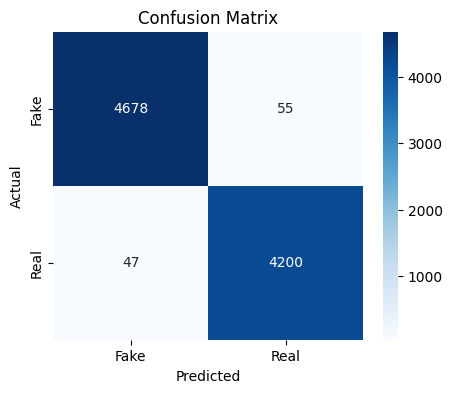

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Program Files\KMSpico\temp\ipykernel_8564\1012638716.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word", y="Frequency", data=freq_df, palette="viridis")


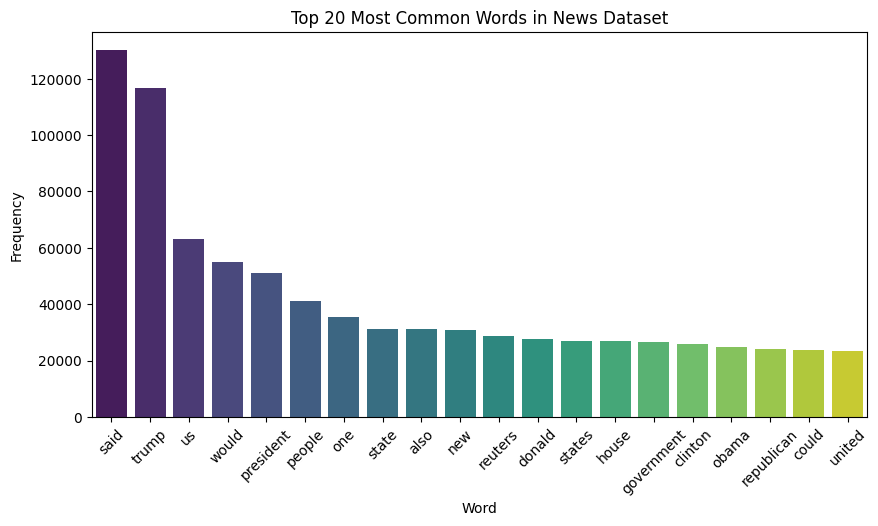

In [13]:
from collections import Counter

# Combine all words into one big list
all_words = " ".join(df["clean_text"]).split()

# Count word frequency
word_freq = Counter(all_words)

# Get top 20 most common words
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Word", y="Frequency", data=freq_df, palette="viridis")
plt.title("Top 20 Most Common Words in News Dataset")
plt.xticks(rotation=45)
plt.show()


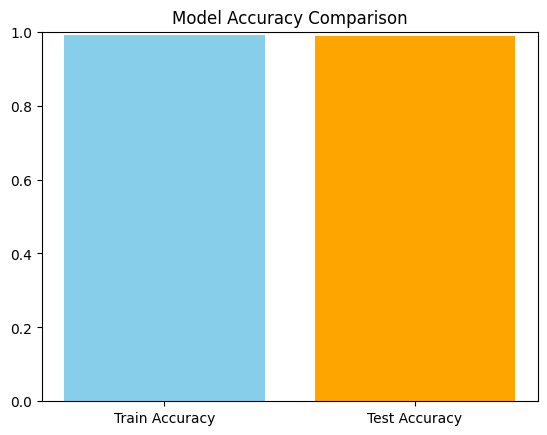

In [14]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=["skyblue", "orange"])
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


C:\Program Files\KMSpico\temp\ipykernel_8564\3796660558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


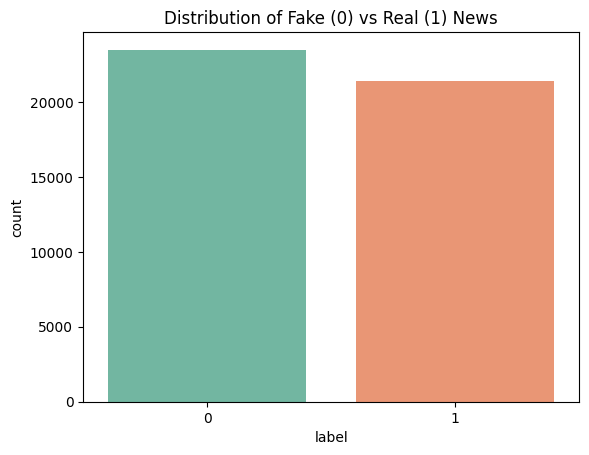

In [15]:
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Distribution of Fake (0) vs Real (1) News")
plt.show()
